# SciPy Optimize Global

## Global Optimization

A <b>local minimum</b> is a the smallest a function value within a local neighborhood.  A <b>global minimum</b> is the lowest value a function takes over its whole range. `minimize` and `minimize_scalar` only locally optimize a function.  Global optimization routines can deal with functions with more than one minima. 

The five methods availible in SciPy optimize are:

* [brute](#brute) 
* basinhopping
* differential_evolution
* shgo
* dual_annealing

In [2]:
# Importing the packages for the example
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

Defining functions for the tutorial:

In [11]:
f = lambda x : 1/25*(x[0]**2 + x[1]**2) - np.cos(x[0])*np.cos(x[1])

f_parameter = lambda x, a : 1/25*(x[0]**2 + x[1]**2) - np.cos(x[0]-a)*np.cos(x[1])

Now that we've defined these functions, what do they look like?

No handles with labels found to put in legend.


Text(0, 0.5, 'x[1]')

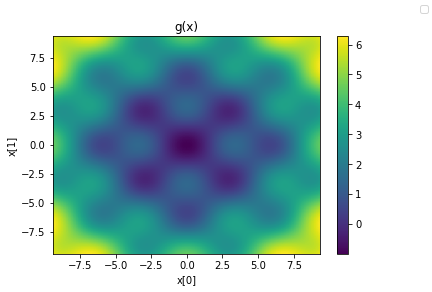

In [20]:
x0=np.arange(-3*np.pi,3*np.pi,.05)

x0_a, x1_a = np.meshgrid(x0,x0)

# plotting our test functions
fig, ax = plt.subplots()
pos = ax.pcolormesh(x0_a,x1_a,g([x0_a,x1_a]) )

# labeling and measuring necessities
fig.legend()
fig.colorbar(pos,ax=ax)
ax.set_title('g(x)')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')

<div id="brute" />

## Brute
<hr>

The brute method, though the computationally intensive, is one of the most surefire ways to reach the global minimum.  It computes the function at all the points on a grid.  

Choosing a coarser grid lessens the computational load, but then the algorithm could miss a minimum if the grid is too coarse.  Like all numerical methods, this is a balancing act based on knowledge of the function.

`brute` takes in the function and a tuple controlling the grid.  The elements of the tuple can either be only bounds:

In [21]:
low = -3*np.pi
high = 3*np.pi
range_version1 = ( (low,high),(low,high) )

optimize.brute(f,range_version1)

array([-3.47966704e-05, -1.01342268e-05])

If you specify a range of `low,high`, then brute will form a grid of `Ns=20` points between the boundaries. You can manually control that number through the `Ns` flag:

In [22]:
Ns=30
optimize.brute(f,range_version1,Ns=Ns)

array([-1.85391370e-05, -6.78182121e-06])

Instead of giving just the boundaries and number of points, you can pass in `slice` objects of low, high, and step:

In [23]:
low = -6*np.pi
high = 6*np.pi
step = 0.5

range_version2 = ( slice(low,high,step),slice(low,high,step) )

optimize.brute(f, range_version2 )

array([ 4.17652142e-05, -2.81951181e-05])

If the function has parameters, they can be passed via `args` in a tuple.

In [25]:
optimize.brute(f_parameter,range_version2, args=(2,))

array([ 1.85137193e+00, -4.07715386e-05])

#### Full Output

The boolean flag `full_output` returns the values computed during the brute computation.  Instead of a single value, the output becomes a tuple containing

| Position | Content | 
| --- | --- | 
| 0 | Minimum position | 
| 1 | Function value at minimum position | 
| 2 | Points function computed at |
| 3 | Function value at computed points |

In [78]:
ans_brute_full_output=optimize.brute(f,ranges=((-6*np.pi,6*np.pi), ),full_output=True)
ans_brute_full_output[3].shape

(20,)

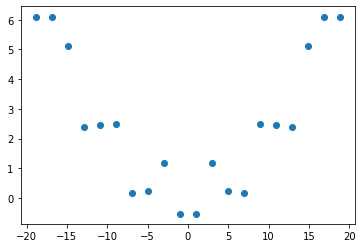

In [79]:
plt.scatter(ans_brute_full_output[2],ans_brute_full_output[3])

Let's see what the output looks like for a multidimensional function:

In [80]:
g_full_output=optimize.brute(g,ranges=(slice(-6*np.pi,6*np.pi,.5),slice(-6*np.pi,6*np.pi,.5) ),full_output=True)

The array of points where the routine computes functions is now a 3D array:

In [81]:
g_full_output[2].shape

(2, 76, 76)

The first index scans over the indenpendent variable.  For example, `g_full_output[2][0,:,:]` controls `x[0]`, while `g_full_output[2][1,:,:]` controls `x[1]`.  

#### Finishing Polish 

Brute by itself will only return the lowest point on the fixed grid, but for the sake of computationally efficiency, the grid can be fairly coarse.

In [91]:
optimize.brute(f,ranges=(slice(-6*np.pi,6*np.pi,.5),),finish=optimize.minimize )

array([-8.58956511e-09])

workers ?   don't really understand that part

## shgo

In [5]:
bounds=[(-6*np.pi,6*np.pi)]

In [6]:
optimize.shgo(f,bounds)

     fun: -1.0
    funl: array([-1.])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 2
   nlfev: 3
   nlhev: 0
   nljev: 1
 success: True
       x: array([0.])
      xl: array([[0.]])

In [44]:
optimize.shgo(g,bounds,args=(0.5,) )

     fun: -0.9951923133916076
    funl: array([-0.99519231])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 2
   nlfev: 12
   nlhev: 0
   nljev: 4
 success: True
       x: array([0.48076808])
      xl: array([[0.48076808]])

## Basin Hopping

In [11]:
result_basinhopping=optimize.basinhopping(f,-3*np.pi)
print(result_basinhopping)

                        fun: -1.0
 lowest_optimization_result:       fun: -1.0
 hess_inv: array([[0.96154906]])
      jac: array([7.4505806e-09])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 4
     njev: 13
   status: 0
  success: True
        x: array([2.42288615e-09])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 1191
                        nit: 100
                       njev: 397
                          x: array([2.42288615e-09])


In [12]:
result_basinhopping.keys()

dict_keys(['minimization_failures', 'nfev', 'njev', 'lowest_optimization_result', 'x', 'fun', 'message', 'nit'])

# Dual Annealing

In [13]:
optimize.dual_annealing(f,bounds)

     fun: -0.9999999999999999
 message: ['Maximum number of iteration reached']
    nfev: 2027
    nhev: 0
     nit: 1000
    njev: 0
  status: 0
 success: True
       x: array([-1.1708391e-08])